In [8]:
"""
feed forward networkを使ってirisを分類する
FFNの理論と実装は、「ゼロから作るDeep Learning」を読むとわかる
"""

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
d = load_iris()
data = d['data']
target = d['target']
train_data, test_data, train_target, test_target = train_test_split(data, target)

In [3]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

def softmax(x):
    m = np.max(x)  # overflow対策
    return np.exp(x - m) / np.sum(np.exp(x - m))

In [4]:
input_size = 4
hidden_size = 10
output_size = 3
lr = 0.01
num_epochs = 200

W = np.random.randn(hidden_size, input_size)
b = np.random.randn(hidden_size)
U = np.random.randn(output_size, hidden_size)

# train
losses = []
for _ in range(num_epochs):
    total_loss = 0
    for x, target_id in zip(train_data, train_target):
        t = np.zeros(output_size)
        t[target_id] = 1.  # one-hot target vector
        v = np.dot(W, x) + b
        h = sigmoid(v)
        z = np.dot(U, h)
        y = softmax(z)
        L = -np.sum(t*np.log(y))
        total_loss += L
        
        # この勾配の計算は、ゼロから作るdeep learningにすべて書いているが
        # 手計算で導出すると行列の微分のよい練習になるし、理解が深まる
        dLdz = y - t
        dLdU = np.dot(dLdz.reshape(-1, 1), h.reshape(1, -1))
        dLdh = np.dot(U.transpose(), dLdz)
        dLdv = dLdh * sigmoid(v) * (1.-sigmoid(v))
        dLdW = np.dot(dLdv.reshape(-1, 1), x.reshape(1, -1))
        dLdb = dLdv
        
        assert dLdz.shape == z.shape
        assert dLdU.shape == U.shape
        assert dLdh.shape == h.shape
        assert dLdv.shape == v.shape
        assert dLdW.shape == W.shape
        assert dLdb.shape == b.shape

        W -= lr*dLdW
        b -= lr*dLdb
        U -= lr*dLdU
    losses.append(total_loss)

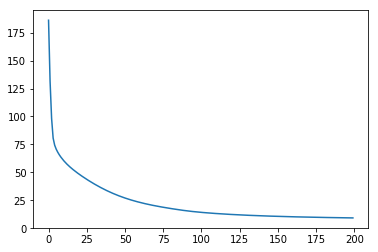

In [5]:
plt.plot(losses)

In [6]:
# predict and evaluate
num_correct = 0
for x, target_id in zip(test_data, test_target):
    v = np.dot(W, x) + b
    h = sigmoid(v)
    z = np.dot(U, h)
    y = softmax(z)
    predicted_id = np.argmax(y)
    if target_id == predicted_id:
        num_correct += 1
accuracy = num_correct / len(test_data)
print(accuracy)

0.9736842105263158
